In [1]:
import numpy as np

## Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

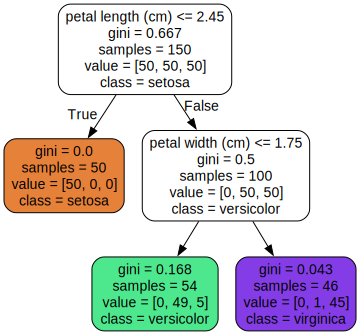

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="temp_graph.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file("temp_graph.dot")

## Making Predictions

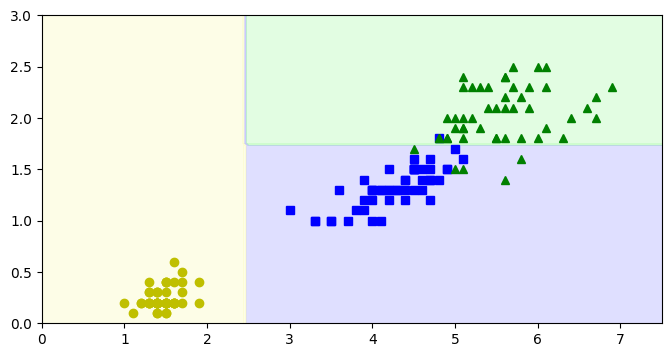

In [4]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
    plt.axis(axes)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, [0, 7.5, 0, 3])
plt.show()

## Estimating Class Probabilities

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regularization Hyperparameters

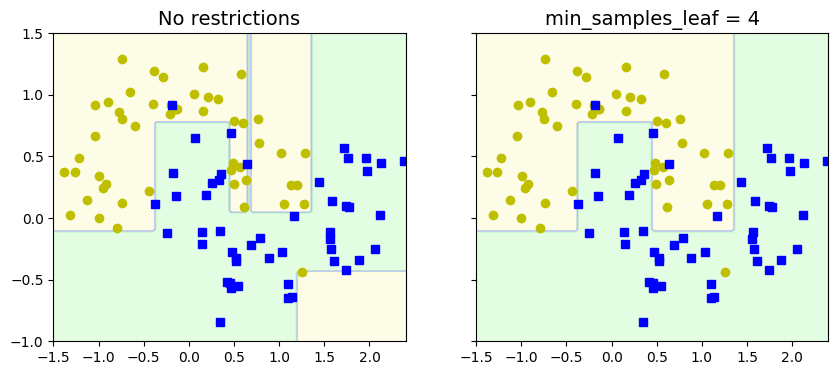

In [7]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

_, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, [-1.5, 2.4, -1, 1.5])
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, [-1.5, 2.4, -1, 1.5])
plt.title(f"min_samples_leaf = {deep_tree_clf2.min_samples_leaf}", fontsize=14)
plt.show()

## Regression

In [8]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

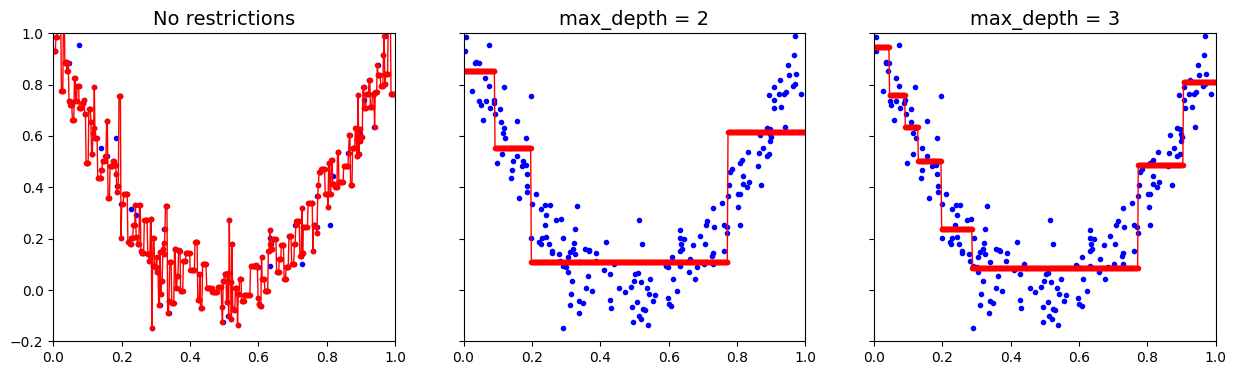

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
tree_reg3.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=1)

_, axes = plt.subplots(ncols=3, figsize=(15, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y, [0, 1, -0.2, 1])
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, [0, 1, -0.2, 1])
plt.title(f"max_depth = {tree_reg2.max_depth}", fontsize=14)

plt.sca(axes[2])
plot_regression_predictions(tree_reg3, X, y, [0, 1, -0.2, 1])
plt.title(f"max_depth = {tree_reg3.max_depth}", fontsize=14)
plt.show()

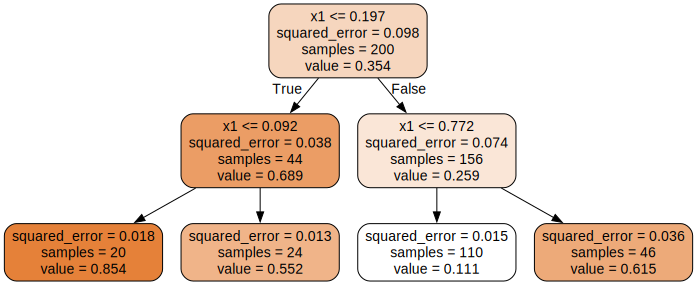

In [10]:
export_graphviz(
    tree_reg2,
    out_file="temp_graph.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file("temp_graph.dot")